### Decision Tree ###

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("../data/kickstarter_cleaned.csv")

In [12]:
#one-hot encode

#category
df_encoded = pd.get_dummies(df, columns=['category'])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#eliminate all non-numerical columns
df = df.select_dtypes(include=['number'])
df.drop([
    'usd_pledged', 'goal'
], axis=1)

#print(df.columns)
#print(df.head(2))

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Tree depth 1
Cross-validation scores: [0.88032946 0.84544574 0.90741638 0.76442075 0.78526418 0.88996607
 0.65244789 0.6839554  0.73630635 0.78623364]
Mean accuracy: 0.7932
Standard deviation of accuracy: 0.0829


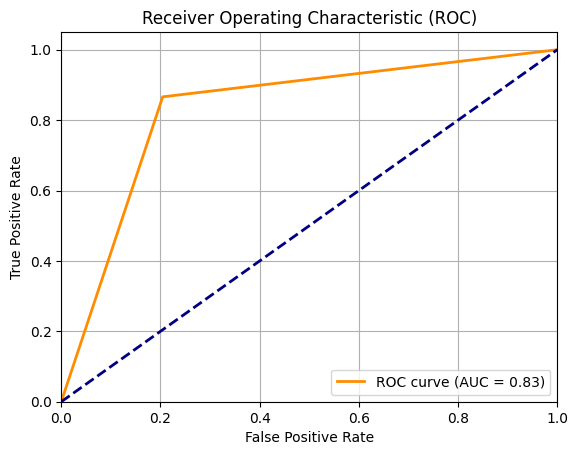

Tree depth 2
Cross-validation scores: [0.84496124 0.875      0.89190499 0.84682501 0.77023752 0.84100824
 0.77702375 0.77944741 0.79398934 0.81047019]
Mean accuracy: 0.8231
Standard deviation of accuracy: 0.0408


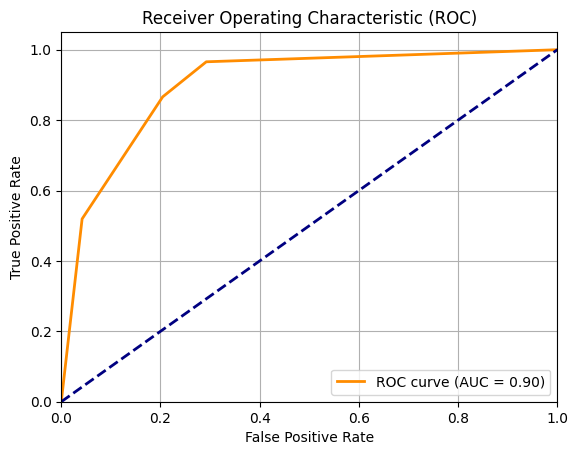

Tree depth 3
Cross-validation scores: [0.9253876  0.92926357 0.96316045 0.8982065  0.90014542 0.9515269
 0.85264178 0.84827921 0.88221037 0.89142026]
Mean accuracy: 0.9042
Standard deviation of accuracy: 0.0364


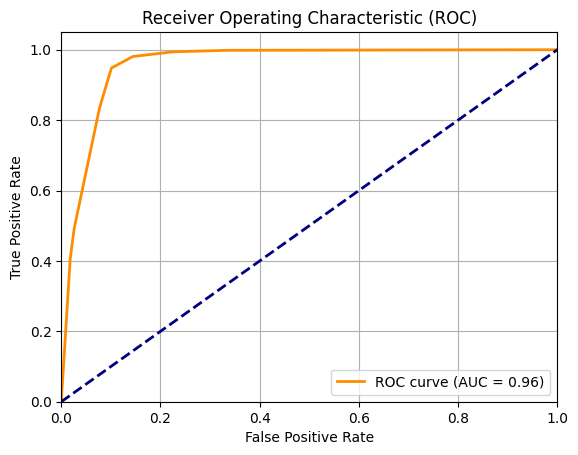

Tree depth 4
Cross-validation scores: [0.95542636 0.96172481 0.96897722 0.91371789 0.94086282 0.96752302
 0.88511876 0.87154629 0.91517208 0.92777508]
Mean accuracy: 0.9308
Standard deviation of accuracy: 0.0326


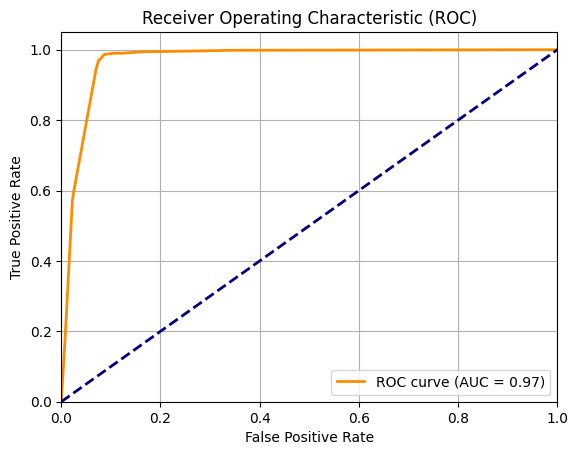

Tree depth 5
Cross-validation scores: [0.97238372 0.97189922 0.98545807 0.93601551 0.96122152 0.97091614
 0.88608822 0.93553078 0.9374697  0.93795444]
Mean accuracy: 0.9495
Standard deviation of accuracy: 0.0276


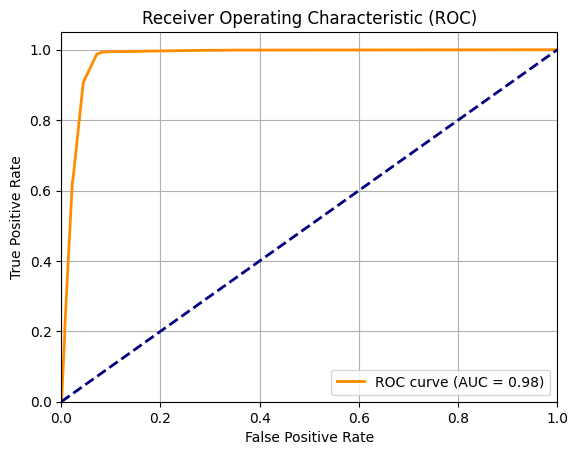

Tree depth 6
Cross-validation scores: [0.9748062  0.9752907  0.98691226 0.96170625 0.96897722 0.98351915
 0.93650024 0.94716432 0.95879787 0.94813379]
Mean accuracy: 0.9642
Standard deviation of accuracy: 0.0158


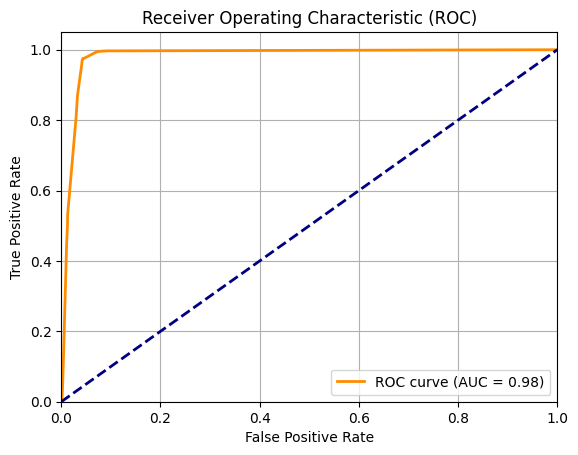

Tree depth 7
Cross-validation scores: [0.98062016 0.98304264 0.98788173 0.96752302 0.97915657 0.98836646
 0.95007271 0.96025206 0.96364518 0.96073679]
Mean accuracy: 0.9721
Standard deviation of accuracy: 0.0127


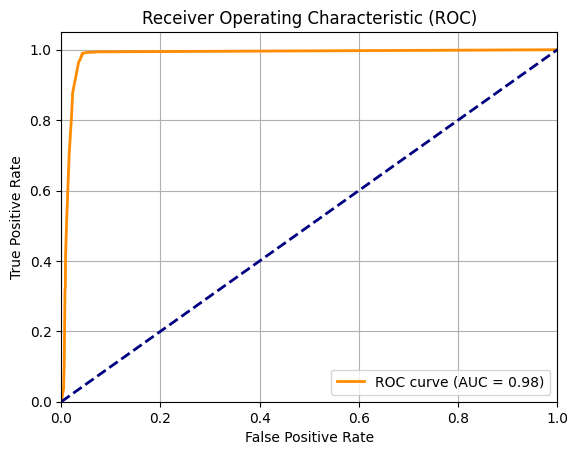

Tree depth 8
Cross-validation scores: [0.98062016 0.98255814 0.98982065 0.9733398  0.97915657 0.98933592
 0.95104217 0.96509937 0.96412991 0.96461464]
Mean accuracy: 0.9740
Standard deviation of accuracy: 0.0119


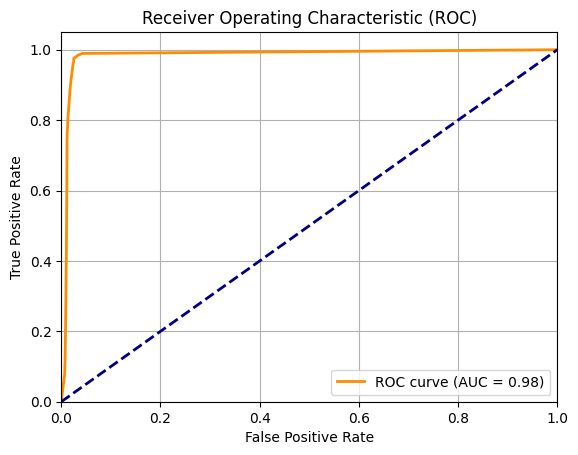

Tree depth 9
Cross-validation scores: [0.98304264 0.98546512 0.98933592 0.97721764 0.98254968 0.98982065
 0.96509937 0.97527872 0.96412991 0.96655356]
Mean accuracy: 0.9778
Standard deviation of accuracy: 0.0093


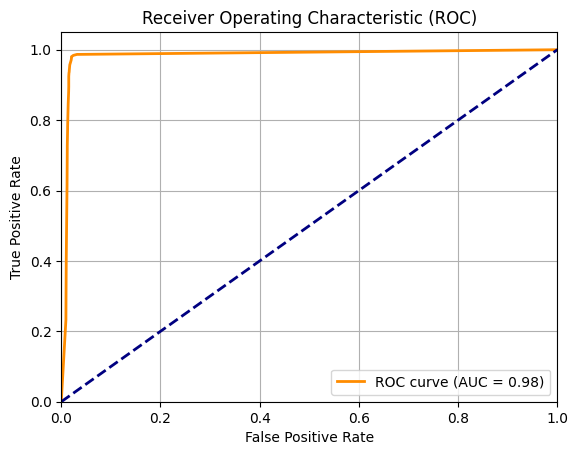

Tree depth 10
Cross-validation scores: [0.97722868 0.98546512 0.99079011 0.97479399 0.98351915 0.98836646
 0.97091614 0.97867184 0.96509937 0.9655841 ]
Mean accuracy: 0.9780
Standard deviation of accuracy: 0.0086


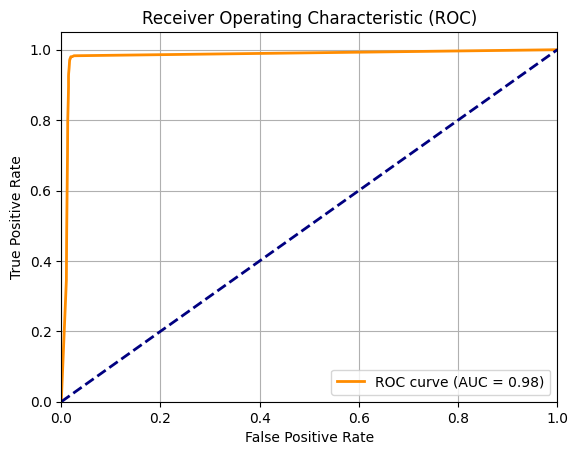

Tree depth 11
Cross-validation scores: [0.97965116 0.98401163 0.99030538 0.98012603 0.98642753 0.98885119
 0.97091614 0.97770238 0.96752302 0.96800776]
Mean accuracy: 0.9794
Standard deviation of accuracy: 0.0079


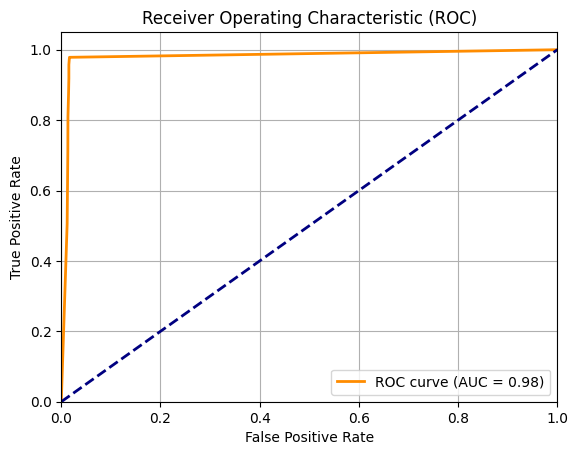

Tree depth 12
Cross-validation scores: [0.98062016 0.98498062 0.98691226 0.98012603 0.98497334 0.98788173
 0.97576345 0.97624818 0.96994668 0.96752302]
Mean accuracy: 0.9795
Standard deviation of accuracy: 0.0067


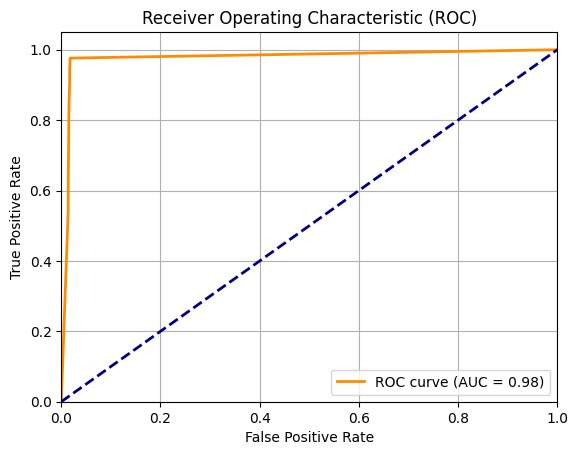

Tree depth 13
Cross-validation scores: [0.98158915 0.98594961 0.98739699 0.97770238 0.98448861 0.9859428
 0.97576345 0.97624818 0.96752302 0.96655356]
Mean accuracy: 0.9789
Standard deviation of accuracy: 0.0071


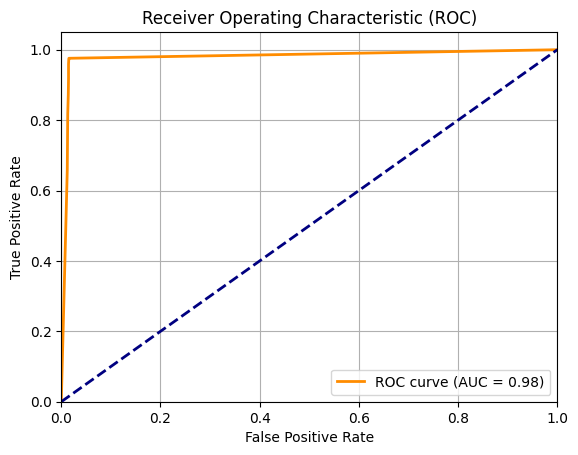

Tree depth 14
Cross-validation scores: [0.98013566 0.98498062 0.98788173 0.98012603 0.9859428  0.98545807
 0.97576345 0.97721764 0.96849249 0.96703829]
Mean accuracy: 0.9793
Standard deviation of accuracy: 0.0069


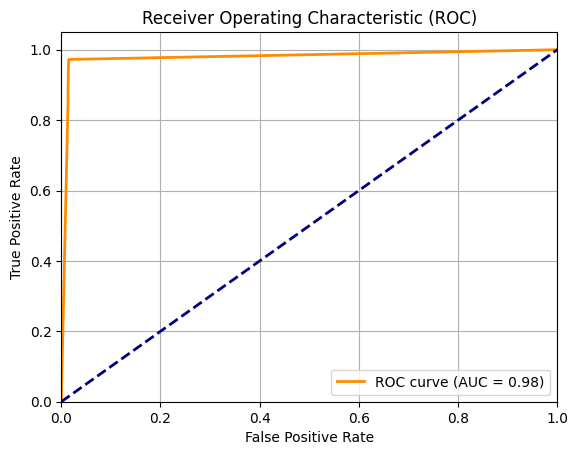

In [23]:
for i in range(1, 15):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    cv_scores = cross_val_score(clf, X, y, cv=10)

    print(f"Tree depth {i}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

    y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
        

In [15]:
#messing around with sample prediction
print(clf.predict(X.iloc[0:1]))

[0]
